This notebook is for my learning purpose. I learned the basic of data science from the notebook called "Data ScienceTutorial for Begineers"

In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

pokemon-challenge

/kaggle/input/pokemon-challenge/pokemon.csv
/kaggle/input/pokemon-challenge/tests.csv
/kaggle/input/pokemon-challenge/combats.csv


In [57]:
data = pd.read_csv("/kaggle/input/pokemon-challenge/pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [59]:
data.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


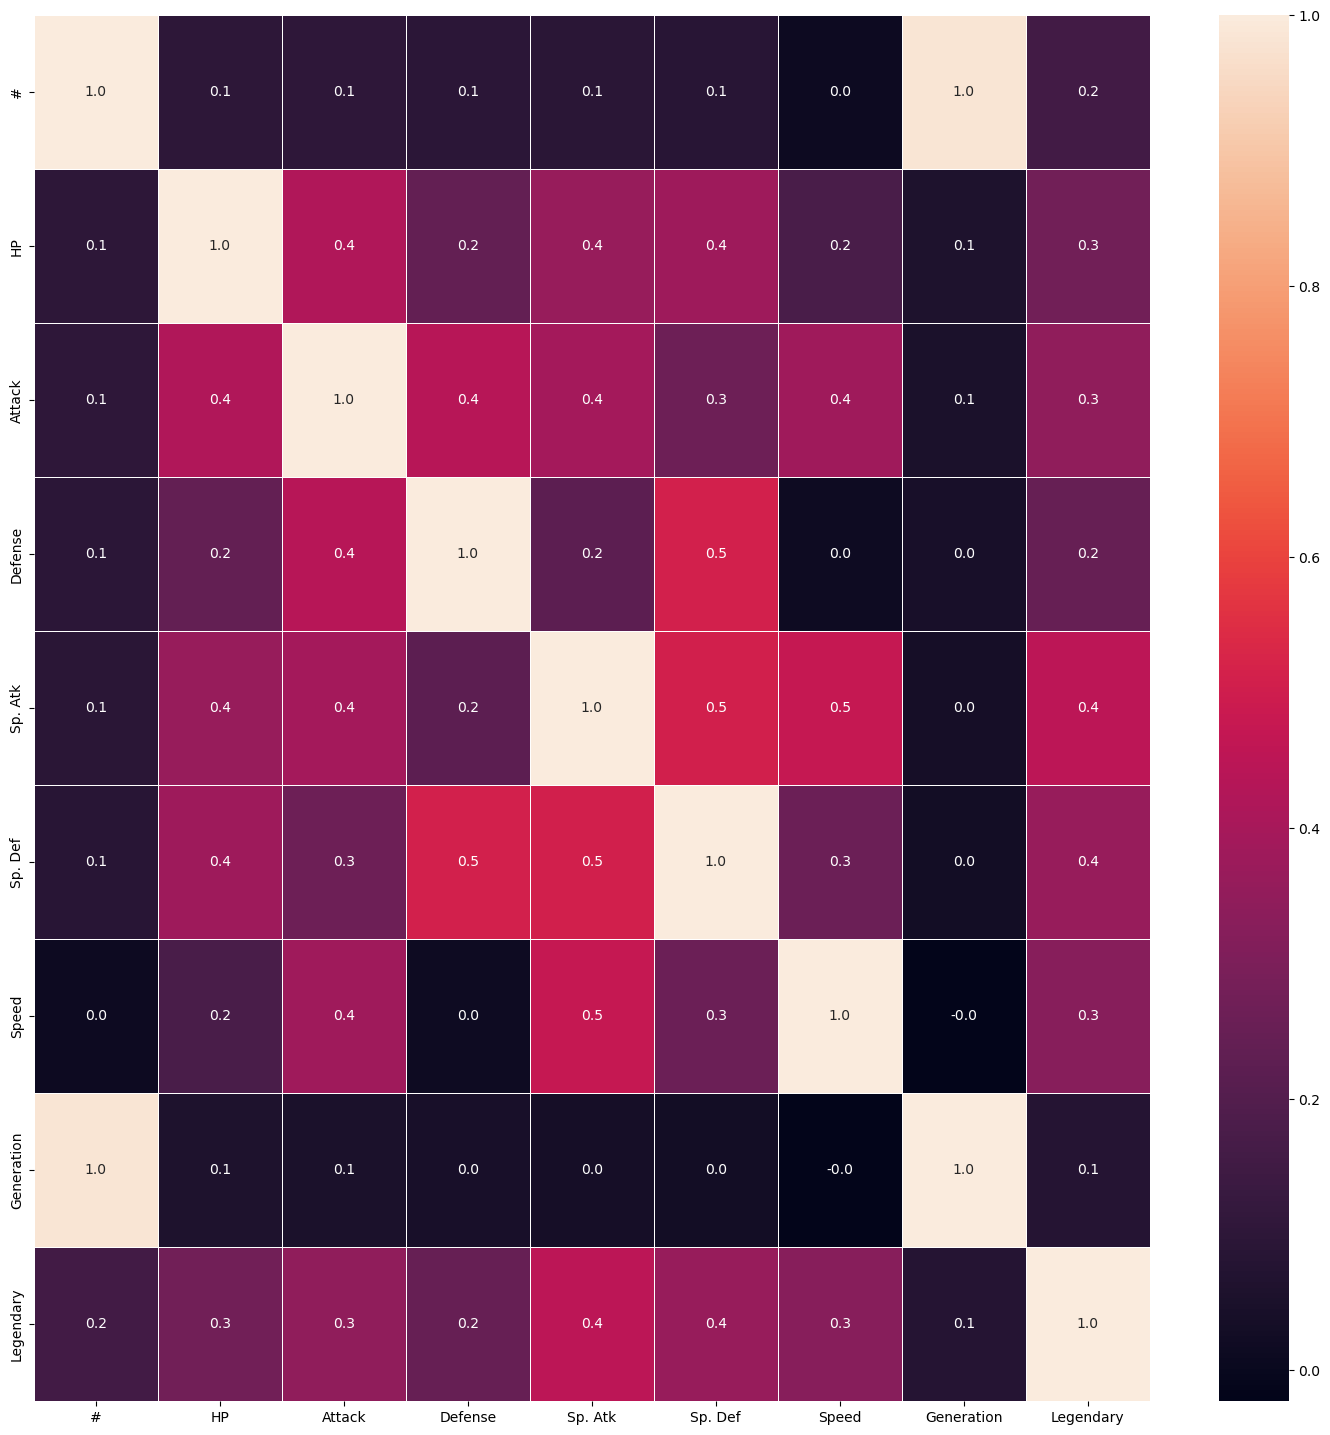

In [60]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [61]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

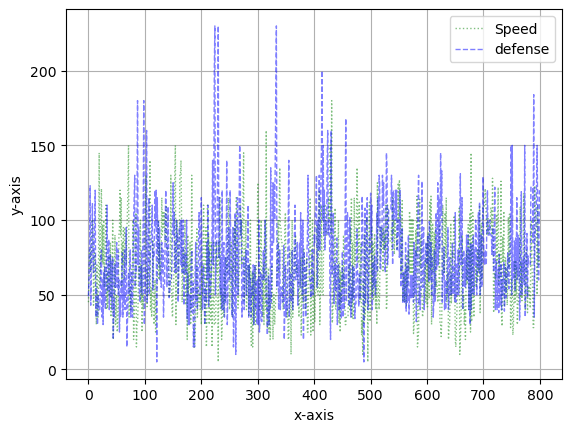

In [62]:
#line plot
data.Speed.plot(kind='line',color='g',label = 'Speed',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.Defense.plot(kind='line',color='b',label='defense',linewidth=1,alpha=0.5,grid=True,linestyle='dashed')
plt.legend(loc='upper right') #put labels inside the plot
plt.xlabel('x-axis') #x-axis label name
plt.ylabel('y-axis') #y-axis label name
plt.show

Text(0.5, 1.0, 'Attack Defense Scatter plot')

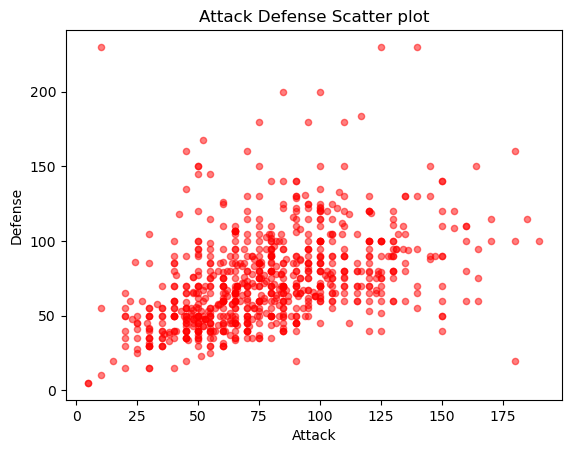

In [63]:
#scatter plot
#x=attack y= defense
data.plot(kind='scatter',x='Attack',y='Defense',alpha=0.5,color='r')
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.title("Attack Defense Scatter plot")

<function matplotlib.pyplot.show(close=None, block=None)>

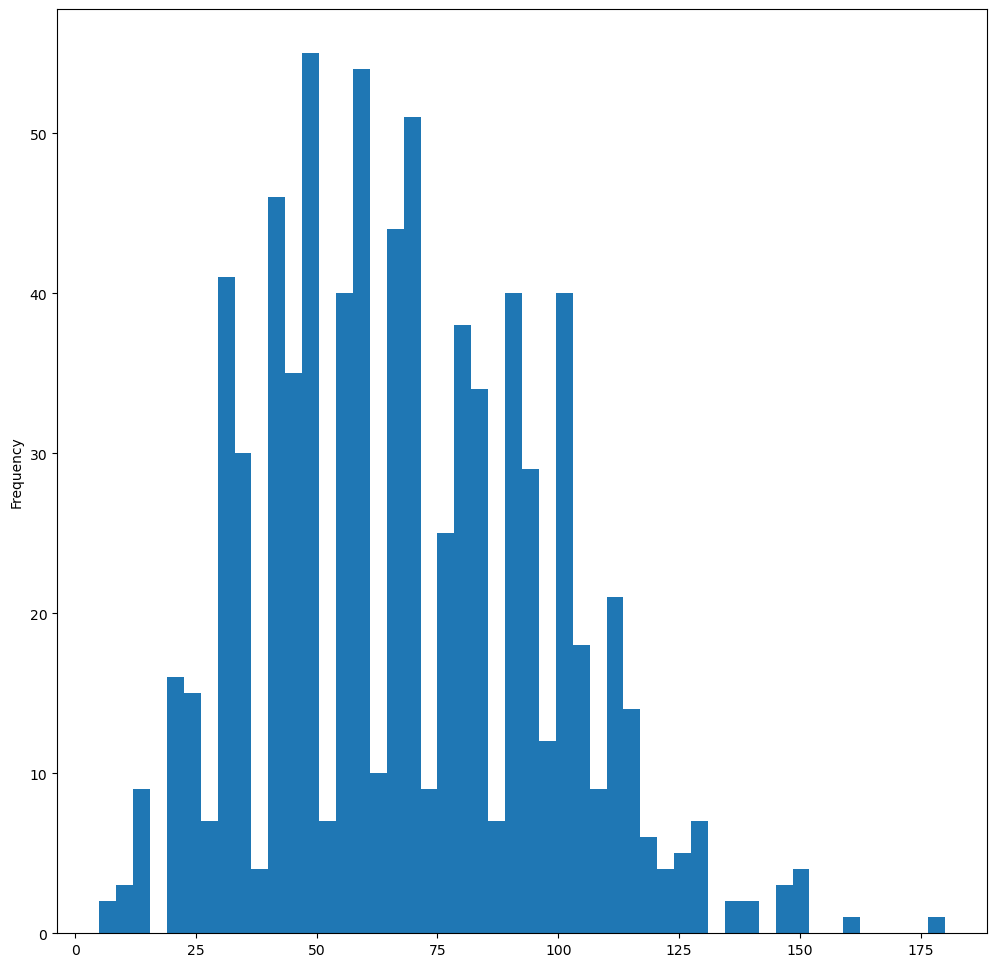

In [64]:
#Histogram
#bins = no.of bars in fig
data.Speed.plot(kind='hist',bins=50,figsize=(12,12))
plt.show

In [65]:
dictionary = {'spain':'magrid','usa':'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['magrid', 'vegas'])


In [66]:
#keys have to immutable like float, integer, string, boolean and tuples
#list is not immutable
#keys are unique
dictionary['spain']='barcalona' #updating dictionary
print(dictionary)
dictionary['france']='paris' #adding new entry
print(dictionary)
del dictionary['spain'] #deleting entry
print(dictionary)
print('france' in dictionary)
dictionary.clear()
print(dictionary)

{'spain': 'barcalona', 'usa': 'vegas'}
{'spain': 'barcalona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [67]:
#PANDAS
# comma seperated values
data = pd.read_csv("../input/pokemon-challenge/pokemon.csv")

In [68]:
series = data['Defense']
print(type(series))
data_frame = data[['Defense']]
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [69]:
print(5<3)
print(5!=4)
print(True and False)
print(False and False)
print(True and True)
print(False or True)

False
True
False
False
True
True


In [70]:
#Filtering the dataframe
x = data['Defense']>200
data[x]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [71]:
#filtering pandas with logical_and
data[np.logical_and(data['Defense']>200,data['Attack']>100)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [72]:
data[(data['Defense']>200) & (data['Attack']>100) ]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


In [73]:
i=0
while i!=5:
    print(i)
    i+=1
print(i,'i is equal to 5')

0
1
2
3
4
5 i is equal to 5


In [74]:
lis=[1,2,3,4,5]
for i in lis:
    print(i)

1
2
3
4
5


In [75]:
#enumerate index and value of list
# index :value = 0:1,1:2,2,3,3:4,4:5

for i,j in enumerate(lis):
    print(i,':',j)

0 : 1
1 : 2
2 : 3
3 : 4
4 : 5


In [76]:
dictionary = {'spain':'magrid','france':'paris'}
for key,value in dictionary.items():
    print(key,':',value)

spain : magrid
france : paris


In [77]:
for value in data['Attack'][0:5]:
    print(value)

49
62
82
100
52


In [78]:
import builtins

In [79]:
dir(builtins)

['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [80]:
def f(a,b=5,c=10):
    s=a+b+c
    return s
print(f(3))

18


In [81]:
def f1(*args):
    for i in args:
        print(i)
        
f1(5)
print(" ")
(f1(5,6,7))

5
 
5
6
7


In [82]:
def f2(**kwargs):
    for key,value in kwargs.items():
        print(key," ",value)
f2(fruit="apple",animail="dog")

fruit   apple
animail   dog


In [83]:
f3 = lambda x:x+47
f4 = lambda hello: hello**2
f4(5)

25

In [84]:
number_of_items = [1,5,10]
c=map(lambda x:x+10,number_of_items)
print(tuple(c))

(11, 15, 20)


In [85]:
name = "Agalya muthukrishnan"
it = iter(name)

In [86]:
list1=[1,2,3,4,5,6]
list2=[10,9,7,8,11,22,33]
list3=zip(list1,list2)
zip1=list(list3)
print(zip1)

[(1, 10), (2, 9), (3, 7), (4, 8), (5, 11), (6, 22)]


In [87]:
un_zip=zip(*zip1)
unzip1,unzip2=list(un_zip)
print(unzip1,unzip2)


(1, 2, 3, 4, 5, 6) (10, 9, 7, 8, 11, 22)


In [88]:
n1=[1,2,3,4,5,6]
n2=[i+1 for i in n1]
print(n2)
n3=[j**2 if j%2==0 else 0 for j in n2 ]
print(n3)

[2, 3, 4, 5, 6, 7]
[4, 0, 16, 0, 36, 0]


In [89]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [90]:
sum([1,2,3,4])

10

In [91]:
threshold = sum(data.Speed)/len(data.Speed)
data["Speed_level"]=['high' if i>threshold else 'low' for i in data.Speed  ]
data.loc[:10 ,['Speed','Speed_level']]

,Speed,Speed_level
0,45,low
1,60,low
2,80,high
3,80,high
4,65,low
5,80,high
6,100,high
7,100,high
8,100,high
9,43,low


In [92]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Speed_level
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,low
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,low
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,high
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,high
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,low


In [93]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Speed_level
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,low
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,high
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,high
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,high
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,high


In [94]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Speed_level'],
      dtype='object')

In [95]:
data.shape

(800, 13)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #            800 non-null    int64 
 1   Name         799 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Atk      800 non-null    int64 
 8   Sp. Def      800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
 12  Speed_level  800 non-null    object
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


In [97]:
del data['Speed_level']

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [99]:
print(data['Type 1'].value_counts(dropna=False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [100]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<AxesSubplot:title={'center':'Attack'}, xlabel='Legendary'>

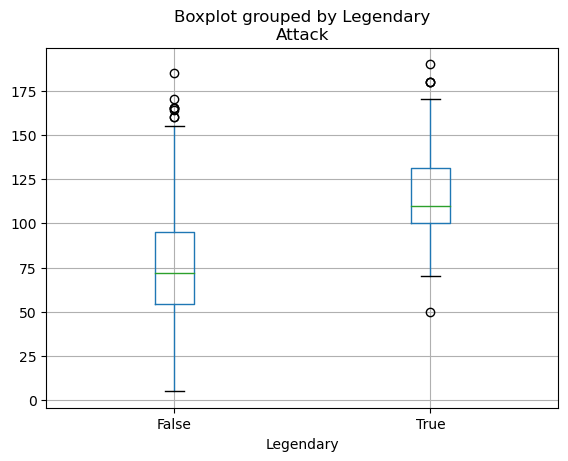

In [101]:
data.boxplot(column='Attack',by='Legendary')

In [102]:
data1= data.head()
data2=data.tail()
concat_d1d2=pd.concat([data1,data2],axis=0)
concat_d1d2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [104]:
data["Type 2"].count()

414

In [105]:
data1 = data
data1["Type 2"].dropna(inplace = True)
# Lets drop nan values
data1=data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True)

In [106]:
data1["Type 2"].value_counts(dropna = False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [107]:
assert 1==1

In [108]:
assert data1["Type 2"].notnull().all()

AssertionError: 

In [ ]:
data["Type 2"].fillna('empty',inplace= True)

In [ ]:
assert data["Type 2"].notnull().all()

In [ ]:
data1=data.loc[:,['Attack','Defense','Speed']]

In [ ]:
data1.plot()

In [ ]:
data1.plot(subplots=True)
plt.show()

In [ ]:
data1.plot(kind="scatter",x="Attack",y="Defense")
plt.show()

In [ ]:
data1.plot(kind="hist",y="Attack",bins=50,range=(0,250),density=True)

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind="hist",y="Defense",bins=50,range = (0,250),ax=axes[0])
data1.plot(kind="hist",y="Defense",bins=50,range = (0,250),ax=axes[1],cumulative=True)
plt.savefig('graph.png')
plt

In [ ]:
data.describe()

In [ ]:
time_list = ["1992-03-04","1992-04-12"]
print(type(time_list[1]))
data_time_object=pd.to_datetime(time_list)
print(type(data_time_object))

In [116]:
import warnings
warnings.filterwarnings("ignore")
data2=data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)
data2["date"] = datetime_object
data2=data2.set_index("date")
data2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [117]:
print(data2.loc["1992-03-10" : "1993-03-16"])

            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False  


In [120]:
data2.resample("M").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
data2.resample("M").first().interpolate("linear")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,0.0
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,0.0
1992-03-31,3.000000,Venusaur,Grass,Poison,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,0.0
1992-04-30,3.083333,None,None,None,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,0.0
1992-05-31,3.166667,None,None,None,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,0.0
1992-06-30,3.250000,None,None,None,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,0.0
1992-07-31,3.333333,None,None,None,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,0.0
1992-08-31,3.416667,None,None,None,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,0.0
1992-09-30,3.500000,None,None,None,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,0.0


In [122]:
data2.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0


In [123]:
data.head(2)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False


In [124]:
data=data.set_index("#")
data.head(2)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False


In [126]:
data.HP[2]

60

In [128]:
data.loc[5,["HP"]]

HP    39
Name: 5, dtype: object

In [129]:
data[["Defense","Attack"]]

,Defense,Attack
#,,
1,49,49
2,63,62
3,83,82
4,123,100
5,43,52
...,...,...
796,150,100
797,110,160
798,60,110


In [130]:
print(type(data["Attack"]))
print(type(data[["Attack"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [132]:
data.loc[:10,"HP":"Speed"]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,
1,45,49,49,65,65,45
2,60,62,63,80,80,60
3,80,82,83,100,100,80
4,80,100,123,122,120,80
5,39,52,43,60,50,65
6,58,64,58,80,65,80
7,78,84,78,109,85,100
8,78,130,111,130,85,100
9,78,104,78,159,115,100


In [138]:
data.loc[10:1:-1,"HP":"Defense"]

,HP,Attack,Defense
#,,,
10,44,48,65
9,78,104,78
8,78,130,111
7,78,84,78
6,58,64,58
5,39,52,43
4,80,100,123
3,80,82,83
2,60,62,63


In [141]:
boolean = data.HP>200
data[boolean]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False


In [142]:
first_filter = data.HP>150
second_filter = data.Speed>35
data[first_filter & second_filter]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
352,Wailord,Water,NaN,170,90,45,90,45,60,3,False
656,Alomomola,Water,NaN,165,75,80,40,45,65,5,False


In [143]:
data.HP[data.HP<15]

#
56     10
317     1
Name: HP, dtype: int64

In [144]:
def div(n):
    return n/2
data.HP.apply(div)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [146]:
data.HP.apply(lambda n:n/2)

#
1      22.5
2      30.0
3      40.0
4      40.0
5      19.5
       ... 
796    25.0
797    25.0
798    40.0
799    40.0
800    40.0
Name: HP, Length: 800, dtype: float64

In [147]:
data["Combine"]=data.Attack+data.Defense
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combine
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [148]:
print(data.index.name)

#


In [149]:
data.index.name="index"
data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combine
index,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,98
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,125
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,165
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,223
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,95


In [150]:
data3 = data.copy()

In [151]:
data3.index=range(100,900,1)

In [153]:
data3.head()
data3.tail()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combine
895,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,250
896,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,270
897,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,170
898,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,220
899,Volcanion,Fire,Water,80,110,120,130,90,70,6,True,230


In [156]:
data1=data.set_index(["Type 1","Type 2"])
data1.head(100)

Name   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                                 
Grass  Poison      Bulbasaur   45      49       49       65       65     45   
       Poison        Ivysaur   60      62       63       80       80     60   
       Poison       Venusaur   80      82       83      100      100     80   
       Poison  Mega Venusaur   80     100      123      122      120     80   
Fire   NaN        Charmander   39      52       43       60       50     65   
...                      ...  ...     ...      ...      ...      ...    ...   
Poison NaN            Grimer   80      80       50       40       50     25   
       NaN               Muk  105     105       75       65      100     50   
Water  NaN          Shellder   30      65      100       45       25     40   
       Ice          Cloyster   50      95      180       85       45     70   
Ghost  Poison         Gastly   30      35       30      100       35     80   

               Generation  Legendary  Combine  
Type 1 Type 2                                  
Grass  Poison           1      False       98  
       Poison           1      False      125  
       Poison           1      False      165  
       Poison           1      False      223  
Fire   NaN              1      False       95  
...                   ...        ...      ...  
Poison NaN              1      False      130  
       NaN              1      False      180  
Water  NaN              1      False      165  
       Ice              1      False      275  
Ghost  Poison           1      False       65  

[100 rows x 10 columns]

In [157]:
dic = {"treatment":["A","A","B","B"],"gender":["F","M","F","M"],"response":[10,45,5,9],"age":[15,4,72,65]}
df = pd.DataFrame(dic)
df

,treatment,gender,response,age
0,A,F,10,15
1,A,M,45,4
2,B,F,5,72
3,B,M,9,65


In [159]:
#groupby - according to treatment take mean of other features
df.groupby("treatment").mean()

,response,age
treatment,,
A,27.5,9.5
B,7.0,68.5


In [162]:
#according to gender take sum of other features
df.groupby("gender").sum()

,response,age
gender,,
F,15,87
M,54,69


In [167]:
#grouping treatment taking max of age feature
df.groupby("treatment").age.max()

treatment
A    15
B    72
Name: age, dtype: int64

In [169]:
#grouping by one feature with multiple features
df.groupby("treatment")[["age","response"]].min()

,age,response
treatment,,
A,4,10
B,65,5


In [170]:
df["gender"] = df["gender"].astype("category")

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   treatment  4 non-null      object  
 1   gender     4 non-null      category
 2   response   4 non-null      int64   
 3   age        4 non-null      int64   
dtypes: category(1), int64(2), object(1)
memory usage: 352.0+ bytes
